# Task 02: U-Value of a Tiny House

The exercise is described on the teaching wiki: https://teawiki.net/doku.php?id=phy2:projects:u-value_v02:start

**1- Sketch the outer envelope of the house roughly. You do not have to take into account details such as rafters, birdsmouth joints or wall layers.**

Please find a detailed video under this link:<br>
https://youtu.be/KitC9YjNGxw

In [1]:
from PIL import Image
myImage = Image.open("House.jpg")
myImage.show() #the picture will open in another program, if not, it is in the same directory under the name of "house"

**2- Make reasonable assumptions about the foundation and ground floor. Determine its U-value. Look for relevant information on the internet. Give the references to all information you are using in your descriptive text.**

Looking in (floortechie) and (thespruce) websites for information about floor layers materials. [1] [2]<br>
They almost have the same information:<br>
Subfloor, underlayment and floor covering. These layers will be on top of each others as series.<br>
They are recommending to choose between a lot of different materials for each layer, so I chose one for each and did my study based on this.<br>
Starting from subfloor from the bottom, I chose concrete.

Looking in passivehouse.com and information about detached houses, there is a residential house constructed by them in Lindlar-Hohkeppel (North Rhine-Westphalia). (3) In the floor section it is stated:
"no basement, concrete floor slab insulated on top
U-value = 0.114 W/(m².K)"

The standard concrete floor slab thickness in residential construction is 4 inches = 10cm. [4]<br>
The concrete thermal conductivity is 1.28 W/(m.K) in a standard of 20 degrees celsius. [5]<br>
Concrete thermal conductivity is 0.8 W/(m.K), this is the value that I will use in my calculations. [6]<br>
**Concrete thickness = 0.1 m; Concrete thermal conductivity = 0.8 W/(m.K)**<br>
<br>
In the underlayment layer over the concrete, the recommended thickness of the layer is between 1/4 and 1/2 inches. [2]. Working on half inches equals to 1.27 cm or 0.127 meters.<br>
Cork is one of the recommended layers. [2].
Thermal conductivity of a cork between 0.032 and 0.044 W/(m.K) depending on its density.<br>
I will consider a middle value that has a thermal  conductivity of 0.038 W/(m.K). The one that has a density of 0.195 g.cm^3.L<br>
**Cork thickness = 0.127 m; Corck thermal conductivity = 0.038 W/(m.K)**<br>
<br>
Ceramic is a recommended choice also which has a thermal conductivity of 1.6 W/(m.K). [7]<br>
Ceramic thickness can be 1/2 or 3/4 inches. Working on 1/2 inches = 0.127 meters.<br>[15]
**Ceramic thickness = 0.127 m; Ceramic thermal conductivity = 1.6 W/(m.K).**<br>
<br>
I will implement all the values now that was mentioned before in a way that we can calculate directly in Python.
Next steps are the calculation of this kind of floor to see if it matches approximately the information of (concreteconstruction).<br>

In [286]:
import numpy as np
np.set_printoptions(precision=3) #rounding arrays to 3 decimals

d: thickness of the layer (m)<br>
λ: thermal conductivity (W/(m∙K))<br>
Λ: thermal transmittance = W/(m²∙K)<br>
Λ = λ/d<br>
R: Thermal Resistance (m²∙K)/W<br>
R = 1/Λ<br>
RT: Total thermal resistance of many layers combined<br>
U-value: total thermal transmittance of many layers combined(W/(m²∙K))<br>
U-value = 1/RT<br>
f: fraction of the area depending on the total area<br>
f= area/total_area<br>



In [287]:
λ_con = 0.8 #concrete thermal conductivity
d_con = 0.1 #concrete thickness
λ_cork = 0.038 #corck thermal conductivity
d_cork = 0.127 #corck thickness
λ_cer = 1.6 #Ceramic thermal conductivity
d_cer = 0.127 #Ceramic thickness

In [288]:
λ_floor = np.array([0.8, 0.038, 1.6]) #thermal conductivity of all the layers respectively (W/(m∙K))
print (λ_floor)

[0.8   0.038 1.6  ]


In [289]:
d_floor = np.array([0.1, 0.127, 0.127]) #thickness of all the layers respectively (m)
print(d_floor)

[0.1   0.127 0.127]


In [290]:
Λ_floor = λ_floor/d_floor #Thermal transmittance of all layers respectively (W/(m²∙K))
print (Λ_floor)

[ 8.     0.299 12.598]


In [291]:
R_floor_arr = 1/Λ_floor #Thermal Resistance of all layers respectively ((m²∙K)/W)
print (R_floor_arr)

[0.125 3.342 0.079]


In [292]:
R_floor = sum(R_floor_arr)
float("{0:.3f}".format(R_floor))

3.546

Rsi = internal surface resistance upwards = 0.17(m²∙K)/W<br>
Rse = external surface resistance upwards = 0.04(m²∙K)/W<br>
Values are by (IS06946)

In [293]:
Rsi_floor = 0.17
Rse_floor = 0.04

In [294]:
R_floor_total = Rsi_floor + R_floor + Rse_floor #Unit (m²∙K)/W
float("{0:.3f}".format(R_floor_total))

3.756

Thermal resistance of the floor = 3.686 (m²∙K)/W

In [295]:
Uvalue_floor = 1/R_floor #W/(m²∙K)
float("{0:.3f}".format(Uvalue_floor))

0.282

Total thermal transmittance of the floor (U-value) = 0.282 W/(m²∙K)

**3- Find U-values for the primitive windows and the front door. Make reasonable assumptions.**

The standard single layer thickness for extremely large windows is 3/16 inches = 0,0023 meters. [8]


In [296]:
#thermal conductivity of single glazing website according to the websites below
#Thermal conductivity = 1
#https://uk.saint-gobain-building-glass.com/en-gb/glass-and-thermal-insulation

#U-value metal frame more or equal than 1 and non metal frame 0.71 to 0.99 so 1
#https://www.efficientwindows.org/gtypes-1/

#3 to 12 mm single glazing glass. U-value 1
#https://arcodoubleglazing.com.au/blog/heat-loss-double-glazed-vs-single-glazed/

λwin = 0.8
dwin = 0.01
Λwin = λwin/dwin
Rwin = 1/Λwin
Λwin

80.0

This value is not reasonable for me that's why I tried to find more information.<br>
Looking at other information online, I found that "the single-glazed window achieves a U-value of 4.8, but it is interesting to note that significant improvements can be made by benign measures such as closing internal shutters, which brings the U-value down to 3.0." [9]

In [297]:
Λw = 3 #I will use this value in my calculations.
Rw = 1/Λw
float("{0:.3f}".format(Rw))

0.333

Thermal Resistance Rw of the window = 0.333

Rsi = internal surface resistance horizontal = 0.13 (m²∙K)/W<br>
Rse = external surface resistance horizontal = 0.04 (m²∙K)/W<br>
Values are by (IS06946)

In [298]:
Rsi = 0.13
Rse = 0.04

In [299]:
Rw_t = Rsi + Rw + Rse
float("{0:.3f}".format(Rw_t))

0.503

Wood thermal conductivity is between 0.04 and 0.12 W/(m.K). Taking the middle value 0.08 W/(m.K). [6]<br>
Standard door thickness is 1.75 inches = 0,044 meters. [10]

In [300]:
λd = 0.08
dd = 0.044
Λd = λd/dd
Rd = 1/Λd
float("{0:.3f}".format(Λd))

1.818

Thermal transmittance U-value of the door = 1.818 W/(m²∙K)

In [301]:
float("{0:.3f}".format(Rd))

0.55

Thermal Resistance Rd of the door = 0.55

In [302]:
Rd_t = Rsi + Rd + Rse
Rd_t

0.72

**4- Determine the U-values of the wall without opening and draw the temperature profile when the room temperature is 20°C and the outside temperature -5°C.**

The wall is made of 4 layers. We determine the thermal resistance of each layer and than we will find the U-value<br>
d: thickness of the layer (m)<br>
λ: thermal conductivity (W/(m∙K))<br>
Λ: thermal transmittance = W/(m²∙K)<br>
Λ = λ/d<br>
R: Thermal Resistance (m²∙K)/W<br>
R = 1/Λ<br>
RT: Total thermal resistance of many layers combined<br>
U-value: total thermal transmittance of many layers combined(W/(m²∙K))<br>
U-value = 1/RT<br>
q: heat flux density (W/m²)<br>
q = (1/R).ΔT<br>
T: temperature (K)<br>
ΔT: temperature difference (K)<br>
ΔT = q.R<br>
f: fraction of the area depending on the total area<br>
f= area/total_area<br>
<br>
**The wall consists of 4 layers, we use the information of these layers in order respectively in all arrays:**<br>
Plaster:<br>
Thicnkess: d1 = 0.01 m; Thermal conductivity λ1 = 0.510 W/(m∙K)<br>
<br>
Sand-lime brick:<br>
Thickness: d2 = 0.24 m; Thermal conductivity λ2 = 0.56 W/(m∙K)<br>
<br>
Core insulation:<br>
Thickness: d3 = 0.04 m; Thermal conductivity λ3 = 0.035 W/(m∙K)<br>
<br>
Solid brick cladding:<br>0.560.56
Thickness: d4 = 0.115 m; Thermal conductivity λ4 = 0.5 W/(m∙K)<br>
<br>
Total layers thickness = 0.405m

In [303]:
dtotal = 0.405

In [304]:
λ = np.array([0.510, 0.56, 0.035, 0.5]) #thermal conductivity of all the layers respectively (W/(m∙K))
print (λ)

[0.51  0.56  0.035 0.5  ]


In [305]:
d = np.array([0.01, 0.24, 0.04, 0.115]) #thickness of all the layers respectively (m)
print(d)

[0.01  0.24  0.04  0.115]


In [306]:
Λ = λ/d #Thermal transmittance of all layers respectively (W/(m²∙K))
print (Λ)

[51.     2.333  0.875  4.348]


In [307]:
R = 1/Λ #Thermal Resistance of all layers respectively ((m²∙K)/W)
print (R)

[0.02  0.429 1.143 0.23 ]


In [308]:
R_wall_west = np.sum([R]) #summ of R1, R2, R3 and R4. Unit ((m²∙K)/W)
float("{0:.3f}".format(R_wall_west))

1.821

In [309]:
R_wall_west_total = Rsi + R_wall_west + Rse #because they are in series and not parallel. Unit ((m²∙K)/W)
float("{0:.3f}".format(R_wall_west_total))

1.991

Thermal resistance of the west wall without windows and door = 1.991 (m²∙K)/W<br>
<br>

In [310]:
Uvalue_wall_west = 1/R_wall_west_total
float("{0:.3f}".format(Uvalue_wall_west))

0.502

Total thermal transmittance of the west wall (U-value) = 0.502 W/(m²∙K)<br>
<br>

In [311]:
ΔT_diff = 25 #Kelvin. 20-(-5) degrees celsius = 25 degrees celsius in difference = 25 Kelvin in difference.
             #Difference measured between internal and external temperature.

In [312]:
q = (1/R_wall_west)*ΔT_diff # total heat flux density. Heat flux is a flow of energy per unit of area (W/m²).
float("{0:.3f}".format(q))

13.728

Heat flux density of the wall is 13.728 (W/m²)<br>
<br>

ΔT_diff = ΔT1 + ΔT2 + ΔT3 + ΔT4<br>
Temperature difference 25 Kelvin of all the wall is the sum of the temperatures differences of all layers.<br>
q = q1 + q2 + q3 + q4<br>
Heat flux of all the wall is the sum of all the heat fluxes of all layers.<br>
ΔT1 = qR1, ΔT2 = qR2, ect... <br>
We can use another formula also to identify the temperature differece of each layer ΔT1 = (R1/Rtotal)*ΔT_diff

In [313]:
ΔT = np.array(R/R_wall_west)*ΔT_diff
print (ΔT)

[ 0.269  5.884 15.69   3.158]


or

In [314]:
ΔT = q*R #temperature difference in all the layers respectively
print (ΔT)

[ 0.269  5.884 15.69   3.158]


This is the temperature difference in each layer starting from inside to outside when the inside temperature is 20°C and the outside temperature -5°C.

In [315]:
import matplotlib.pyplot as plt

In [316]:
print (d)

[0.01  0.24  0.04  0.115]


In [317]:
d_cm = d*100
print (d_cm)

[ 1.  24.   4.  11.5]


In [318]:
d_cm1 = d_cm.cumsum()
d_cm1

array([ 1. , 25. , 29. , 40.5])

In [319]:
d_cm2 = np.array([0, d_cm1[0],d_cm1[1], d_cm1[2], d_cm1[3]])
d_cm2

array([ 0. ,  1. , 25. , 29. , 40.5])

In [320]:
ΔT3 = np.array([20, 19.73, 13.84, -1.84, -5])

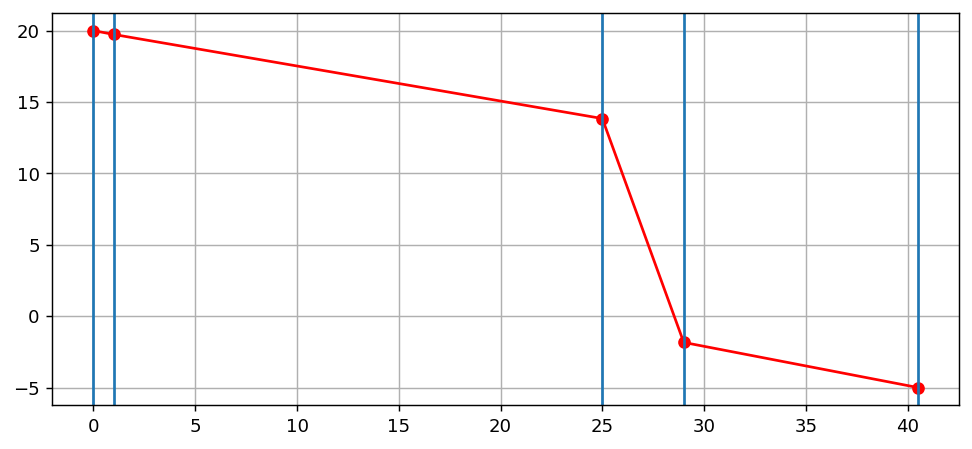

In [321]:
fig1, ax = plt.subplots(figsize=(9,4), dpi=130)
ax.plot(d_cm2, ΔT3, 'r-o')
#ax.plot(x1,y1)
plt.axvline(x=0, ymin=0, ymax=1)
plt.axvline(x=1, ymin=0, ymax=1)
plt.axvline(x=25, ymin=0, ymax=1)
plt.axvline(x=29, ymin=0, ymax=1)
plt.axvline(x=40.5, ymin=0, ymax=1)
plt.grid(True)
plt.show()

**5- Determine the U-values of the other walls**

**Determining the east wall:**

Now we have all information for the wall structure that combines a 4 layers, and we have infomrtation for the door. Combining them in parallel. But first we should identify how much is the percentage space proportion of each of the door and the wall, so we should identify the f.

In [322]:
A_d = 2*1 #A_d is the door area
A_ew = 5*2.5 - A_d #A_ew is the area of the east wall
A_ew

10.5

The area of the wall without the door area is 10.5 square meters

In [323]:
A_d

2

The area of the door is 2 square meters

In [324]:
A_ewt = 2.5*5 #total east wall area
A_ewt

12.5

The total area of the east wall combining the wall and the door is 12.5 square meters.<br>
Dividing the area of the door by the total area and the area of the wall by the total area of the east wall to find the fraction

In [325]:
f_d = A_d/A_ewt
f_d

0.16

The door forms 16% from the total east wall area

In [326]:
f_ew = A_ew/A_ewt
f_ew

0.84

The wall that consists of 4 layers forms 84% of the total east wall area

In [327]:
X1 = f_d*(1/Rd_t) + f_ew*(1/R_wall_west_total)
#X1 = 1/R_wall_east_total. I did it this way because python doesn't give results when using the formula as it is.
#R_wall_west_total is the total thermal resistance of the west wall which has same layers as the east, south and north walls

R_wall_east_total = 1/X1
float("{0:.3f}".format(R_wall_east_total)) #Unit ((m²∙K)/W)

1.553

Or we can calculate it this way:

In [328]:
R_wall_east_total = Rd_t*R_wall_west_total/((f_d*R_wall_west_total)+(f_ew*Rd_t)) 
float("{0:.3f}".format(R_wall_east_total)) #Unit ((m²∙K)/W)

1.553

In [329]:
Uvalue_wall_east = 1/R_wall_east_total
float("{0:.3f}".format(Uvalue_wall_east))

0.644

In [330]:
float("{0:.3f}".format(Uvalue_wall_west))

0.502

Comparin the Uvalue of the east wall and the west wall, we find that that there is a small difference because of the door. The door is less likely to store the energy as it is consisting of wood only without adding insulation materials. But it doesn't affect the U-value a lot as it takes only 16% of the total area of the wall.

<br>**Determining south and north wall:**<br>

We will use the same steps that we used to identify the U-value of the east wall but instead of the door we have to use the information of the window. We can identify the U-value of one of the 2 sides either south or north, and the other wall would have the same value as they are exactly the same.

In [331]:
A_w = 1.6*1 #A_w is the window area
A_sw = 5*2.5 - A_w #A_sw is the area of the east wall
A_sw

10.9

The area of the wall without the window area is 10.9 square meters

In [332]:
A_w

1.6

The area of the window is 1.6 square meters

In [333]:
A_swt = 2.5*5 #total south wall area is the same as the total east wall area
A_swt

12.5

The total area of the east wall combining the wall and the door is 12.5 square meters. It is the same are as the east wall so we can use also R_wall1 to calcylate the total thermal resistance.

Finding the fraction of the window and the wall without window respectively:

In [334]:
f_w = A_w/A_swt
f_w

0.128

The window forms 12.8% from the total south wall area

In [335]:
f_sw = A_sw/A_swt
f_sw

0.872

The wall that consists of 4 layers forms 87.2% of the total south wall area

In [336]:
X2 = f_w*(1/Rw_t) + f_sw*(1/R_wall_west_total) 
#X2 = 1/R_wall_south. Did it this way because python doesn't give results when using the formula as it is.
#R_wall_south_total is the total thermal resistance of the east wall

R_wall_south_total = 1/X2
float("{0:.3f}".format(R_wall_south_total)) #Unit ((m²∙K)/W)

1.445

In [337]:
Uvalue_wall_south = 1/R_wall_south_total
float("{0:.3f}".format(Uvalue_wall_south))

0.692

In [338]:
float("{0:.3f}".format(Uvalue_wall_east))

0.644

In [339]:
float("{0:.3f}".format(Uvalue_wall_west))

0.502

Comparing to the U-value of the wall that includes the door, we see that also there is a small difference because the window has a smaller thermal resistance than the door. Even the window area is smaller than the area of the door and still the U-value including the window is bigger, so the north and south wall loses heat more than the east wall. And the east wall loses energy more than the west wall.
The north wall has the same values of the south wall.

In [340]:
R_wall_north_total = R_wall_south_total #Unit ((m²∙K)/W)
Uvalue_wall_north = Uvalue_wall_south
float("{0:.3f}".format(Uvalue_wall_north))

0.692

**6- Determine the U-value of the roof.**

To identify rafter length, we have a triangle of 5 meters (from the bottom of the roof south to north wall) and height of 1.5 meters. When dividing the triangle by 2 we will have 2 new triangles of 1.5 meters by 2.5 meters with an angle between them of 90 degrees. Using pitagora formula c² = a² + b², the length will be 2.91 m

The length on top of the roof from the east side to west side is 5 meters. When dividing two rafters with a distance of 60 cm in the middle between them + 8 cm the thickness of the rafter. We will have the distance between the left of two adjacents rafters 68cm, and we will have 7 rafters in total in 5 meters. 7 rafters on each side of the roof. So on both sides 14 rafters.

Timber rafters thermal conductivity = 0.13 (W/(m∙K))

In [341]:
λ_rafters = 0.13 #Timber rafters thermal conductivity = 0.13 (W/(m∙K))

Evaluating the area of the 14 rafters, 2.91 m * 0.08 * 14 = 3.25 m²<br>
Length of the rafter = 2.91 m<br>
Thickness = 0.08m = 80cm<br>
Total of 14 rafters<br>

In [342]:
d_rafters = 0.15 #assuming that the rafters thickness is 15cm = 0.15 meters

In [343]:
Λ_rafters = λ_rafters/d_rafters #Thermal transmittance of rafters (W/(m²∙K))
float("{0:.3f}".format(Λ_rafters))

0.867

In [344]:
R_rafters = 1/Λ_rafters #Thermal Resistance of rafters. Unit ((m²∙K)/W)
float("{0:.3f}".format(R_rafters))

1.154

Area_1 = Area of the roof without the walls is 2.91 * 5 * 2 = 29.1 meters<br>
Multiplying by 2 because both sides of the roof.
The walls of the east and west of the roofs are taking part of the roof also. The area of each side is:<br>
5*1.5/2 = 3.75 square meters * 2 = 7.5 square meters. We multiply by 2 because 2 sides.<br>
Total area of the roof is 36.6 square meters

In [345]:
area_roof = 36.6
area_1 = 29.1
area_rafters = 3.25
area_walls_roof = 7.5

In [346]:
f_rafters = area_rafters/area_roof #f is the fraction of the rafters area comparing to the total area of the roof
float("{0:.3f}".format(f_rafters))

0.089

For the roof, recommended is mineral wool, thickness of 30cm = 0.3m. Thermal conductivity of 0.04. [11]

In [347]:
d_wool = 0.3

In [348]:
λ_wool = 0.04 #mineral wool thermal conductivity = 0.04 (W/(m∙K))

The area of mineral wool is the rest area other than the rafters, subtracting the rafters area from the total roof area on both sides so we can identify the mineral wool area.

In [349]:
Λ_wool = λ_wool/d_wool #Thermal transmittance of mineral wool 0.133 (W/(m²∙K))
float("{0:.3f}".format(Λ_wool))

0.133

In [350]:
R_wool = 1/Λ_wool #Thermal Resistance of mineral wool. Unit ((m²∙K)/W)
print (R_wool)

7.5


In [351]:
area_wool = area_1 - area_rafters #d_wool = total area of mineral wool in the roof both sides 25.85 m²
print (area_wool)

25.85


In [352]:
f_wool = area_wool/area_roof #f is the fraction of the mineral wool area comparing to the total area of the roof
float("{0:.3f}".format(f_wool))

0.706

In [353]:
f_walls_roof = area_walls_roof/area_roof
float("{0:.3f}".format(f_walls_roof))

0.205

The roof walls have the same thermal resistance as the west walls (R_wall_west_total) as they consist of same materials without any windows or doors. 

In [354]:
float("{0:.3f}".format(R_wall_west_total))

1.991

Rsi = internal surface resistance downwards = 0.1(m²∙K)/W<br>
Rse = external surface resistance downwards = 0.04(m²∙K)/W<br>
Values are by (IS06946)

In [355]:
Rsi_roof = 0.1
Rse_roof = 0.04

In [356]:
R_rafters_total = Rsi_roof + R_rafters + Rse_roof
float("{0:.3f}".format(R_rafters_total)) #Unit ((m²∙K)/W)

1.294

In [357]:
R_wool_total = Rsi_roof + R_wool + Rse_roof
float("{0:.3f}".format(R_wool_total)) #Unit ((m²∙K)/W)

7.64

In [358]:
X2 = f_rafters*(1/R_rafters_total) + f_wool*(1/R_wool_total) + f_walls_roof*(1/R_wall_west_total)
#X2 = 1/R_roof_total. I did it this way because python doesn't
#give results when using the formula as it is.

R_roof_total = 1/X2
float("{0:.3f}".format(R_roof_total)) #Unit ((m²∙K)/W)

3.788

In [359]:
Uvalue_roof = 1/R_roof_total
float("{0:.3f}".format(Uvalue_roof))

0.264

<br>

**7 Determine the U-value of the whole house.**

In order to determine the Uvalue of all the house, we should combine all the walls, ground and roof as parallel, because they are touching each others on the sides and exchanging temperature also.<br>
First we should have to determine the fraction of each side before doing the calculations.

In [360]:
area_house = 5*5 + 5*2.5*4 + 5*1.5*2 + 2.91*5*2  #5*5(ground area); 5*2 (wall area)*4 (4 equal walls);
                                               #2.91*5 (roof)*2 (2 sides). Unit = square meters
area_house

119.1

In [361]:
fr_wall_west = 12.5/area_house
float("{0:.3f}".format(fr_wall_west))

0.105

In [362]:
fr_wall_east  = fr_wall_north = fr_wall_south = fr_wall_west #as they have equal are size in square meters
float("{0:.3f}".format(fr_wall_east))

0.105

In [363]:
float("{0:.3f}".format(fr_wall_south))

0.105

In [364]:
float("{0:.3f}".format(fr_wall_north))

0.105

In [365]:
fr_floor = 25/area_house
float("{0:.3f}".format(fr_floor))

0.21

In [366]:
fr_roof = area_roof/area_house
float("{0:.3f}".format(fr_roof))

0.307

In [367]:
X3 = fr_wall_west*(1/R_wall_west_total) + fr_wall_east*(1/R_wall_east_total) + fr_wall_south*(1/R_wall_south_total) + fr_wall_north*(1/R_wall_north_total) + fr_floor*(1/R_floor_total) + fr_roof*(1/R_roof_total)
#X3 = 1/R_house. I did it this way because python doesn't
#give results when using the formula as it is.

R_house = 1/X3
float("{0:.3f}".format(R_house))

2.484

In [368]:
Uvalue_house = 1/R_house
float("{0:.3f}".format(Uvalue_house))

0.403

**8- How much energy would you lose per day for domestic heating, when interior and exterior temperatures are 20°C and -5°C, respectively?**

Using Stefan Boltzmann Law to calculate the energy loss

In [369]:
Heat_loss = (area_house*1/R_house)*ΔT_diff #Unit (W)
float("{0:.3f}".format(Heat_loss))

1198.842

1 watts = 86400 (joules/day)

In [370]:
Heat_energy = Heat_loss * 86400 #Unit (joules/day)
float("{0:.3f}".format(Heat_energy))

103579958.973

**9- Choose one of the following actions to improve the insulation properties of the house and calculate:<br>
a. Better windows<br>
b. Better wall insulation (How would you do it?)<br>
c. Better roof insulation (How would you do it?)**

In [371]:
Uvalue_wall_west #W/(m²∙K)

0.5022509848058525

In [372]:
Uvalue_wall_east #W/(m²∙K)

0.6441130494591384

In [373]:
Uvalue_wall_south #W/(m²∙K)

0.6922674945122929

In [374]:
Uvalue_floor #W/(m²∙K)

0.2819697068071568

In [375]:
Uvalue_roof #W/(m²∙K)

0.26399674442262194

Uvalue of the window 4.8 W/(m²∙K)<br>
Uvalue of the door 1.8 W/(m²∙K)

Looking at the values, the south and north walls have the biggest Uvalues, this is because of the windows. Although the area of the window is smaller than the area of the door, but it has a bigger effect on the total Uvalue of the walls, that's why it helps a lot to change the windows.<br>
The door also has an effect and it is better to insulate it more.
But looking at the west wall it has also a high Uvalue of 0.5 even though it doesn't have any window or door, highest than the value required in cold countries, and if we better insulate the wall it has a biggest advantage of the insulation in total than improve the windows or the door because the walls have the biggest area.<br>
If I have to choose only one option I will choose to improve the walls insulation, but I will list the improvements of all the 3 points.

a- For better insulation of the windows, double glazing is better than single glazing windows, especially when filled with argon gas and not natural air. The layer of argon gas has 67% of thermal conductivity of air, making it a poor conductor of heat, thus keeping warm air trapped inside your home and helping improve energy efficiency. [16]<br>
b- For better wall insulation, a thicker core insulation, 10cm instead of 4cm, or put glass wool sandwich panel 50cm thickness and has a very low thermal conductivity less than 0.04. Insulating from outside better than insulating from inside to avoid humidity problems. Glass wool sandwich panel are nonflammable, excellent for sound absorption, anti corrosion and very good for insulation.<br>
c- The roof is somehow good insulated, but for better insulation, we can use thicker mineral wool, or installing glass wool between the mineral wool and the bricks near the rafters, as well as covering the rafters with a small layer of glass wool to insulate them more.

**10- What is the German EnEV? What is it good for?**

The new EnEV requires the following of all buildings erected from 1 January 2016:<br>
Lower consumption of primary energy, by an average of 25 percent of the current ceiling.<br>
The thermal insulation used on the building envelope must be 20 percent more effective as measured by its overall heat transfer coefficient.[12]<br>
In the EnEV is regulated, which energy standard a house, or parts of the house after a renovation must reach, or which requirements are made on new buildings. The EnEV is reformulated and tightened again and again over the years so that by the year 2050 an almost climate-neutral building stock can be realised.<br>
An important measure for compliance with the EnEV is the installation of suitable windows and doors that do not exceed a certain U-value.[13]<br>
It is good for the environment to reduce pollution as the goal is to achieve climate-neutral building stock by the year 2050, especially that third of CO2 emissions are caused by buildings.[14]


**11- What is the proportion of energy consumption for heating on the total energy in Germany?**

More than 53 percent of total final energy consumption in Germany is accounted for by the provision of heat,” AGEB reported.[17] 

**12- Justify all your steps and give sources (literature, links, …).**

1- https://floortechie.com/flooring-anatomy-covering-underlayment-subfloor-joists/<br>
2- https://www.thespruce.com/flooring-underlayment-1821628<br>
3- https://passivehouse-database.org/#d_0121<br>
4- https://www.concreteconstruction.net/how-to/construction/concrete-floor-slabs_o<br>
5- https://en.wikipedia.org/wiki/List_of_thermal_conductivities<br>
6- http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/thrcn.html<br>
7- Effting, Carmeane & Guths, Saulo & Orestes, Alarcon. (2007). Evaluation of the thermal comfort of ceramic floor tiles. Materials Research-ibero-american Journal of Materials - MATER RES-IBERO-AM J MATER. 10. 10.1590/S1516-14392007000300016.<br>
8- https://www.energyswingwindows.com/about-us/news-and-events/27217-what-is-the-thickness-of-glass-used-in-most-residential-replacement-windows.html<br>
9- https://www.buildingconservation.com/articles/thermal/thermal.htm<br>
10- https://www.doornmore.com/help/what-is-the-standard-size-for-residential-homes.html<br>
11- https://en.wikipedia.org/wiki/R-value_(insulation)<br>
12- https://www.swisskrono.de/News-Articles/The-2014-German-Energy-Saving-Ordinance-EnEV-2014-Stricter-Requirements-for-Energy-Efficiency-0522282941.html<br>
13- https://www.enersign.com/en/glossar/energieeinsparverordnung-enev/<br>
14- https://www.inventer.eu/blog/enev-information-on-the-energy-saving-ordinance-for-owners/<br>
15- https://www.hunker.com/12609430/how-thick-is-ceramic-tile<br>
16- https://www.anglianhome.co.uk/double-glazing-windows/faq/how-do-they-work<br>
17- https://www.cleanenergywire.org/news/german-households-use-less-energy-heating-more-cooling<br>